In [1]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from TwitterRetriever import TwitterRetriever
from RiskAssessor import RiskAssessor

In [2]:
vendors = pd.read_excel('data/vendors_keywords.xlsx', sheet_name = 'Vendors').vendorProject.unique()
keywords = pd.read_excel('data/vendors_keywords.xlsx', sheet_name = 'Security Phrases', header = None)[0].values

In [3]:
# For results from the last 30 days, use "premium = True"
# Note that the requests limit might be exceeded
twitter_retriever = TwitterRetriever(premium = False) 
risk_assessor = RiskAssessor(twitter_retriever, vendors, keywords, latest = True)

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji
100%|██████████| 676/676 [01:20<00:00,  8.36it/s]


In [4]:
risk_df = pd.DataFrame(columns = ['vendor', 'relative_risk', 'relative_risk_with_popularity',
                                  'absolute_risk', 'absolute_risk_with_popularity', 
                                  'relative_risk_rank', 'risk_by_sentiment_analysis'])
for vendor in risk_assessor.tweets.vendor.unique():
    relative_risk = risk_assessor.get_relative_vendor_risk(vendor)
    relative_risk_with_popularity = risk_assessor.get_relative_vendor_risk(vendor, True)
    absolute_risk = risk_assessor.get_absolute_vendor_risk(vendor)
    absolute_risk_with_popularity = risk_assessor.get_absolute_vendor_risk(vendor, True)
    relative_risk_rank = risk_assessor.get_relative_vendor_risk_rank(vendor)
    risk_by_sentiment_analysis = risk_assessor.get_vendor_risk_by_sentiment_analysis(vendor)
    risk_df.loc[len(risk_df)] = [vendor, relative_risk, relative_risk_with_popularity, 
                                 absolute_risk, absolute_risk_with_popularity, 
                                 relative_risk_rank, risk_by_sentiment_analysis]    

In [5]:
risk_df.fillna(0)

,vendor,relative_risk,relative_risk_with_popularity,absolute_risk,absolute_risk_with_popularity,relative_risk_rank,risk_by_sentiment_analysis
0,adobe,1.18,0.75,0.02,0.01,medium,11.62
1,android,12.13,7.60,0.22,0.14,high,21.88
2,apache,8.88,123.56,0.16,2.21,high,12.67
3,apple,14.64,10.51,0.26,0.19,high,8.33
4,atlassian,0.74,2.13,0.01,0.04,medium,24.80
5,cisco,7.25,38.56,0.13,0.69,medium,19.90
6,citrix,0.15,0.10,0.00,0.00,low,97.00
7,dell,1.48,2.94,0.03,0.05,medium,8.30
8,docker,5.62,13.76,0.10,0.25,medium,0.00
9,drupal,0.15,0.06,0.00,0.00,low,0.00


<AxesSubplot:ylabel='vendor'>

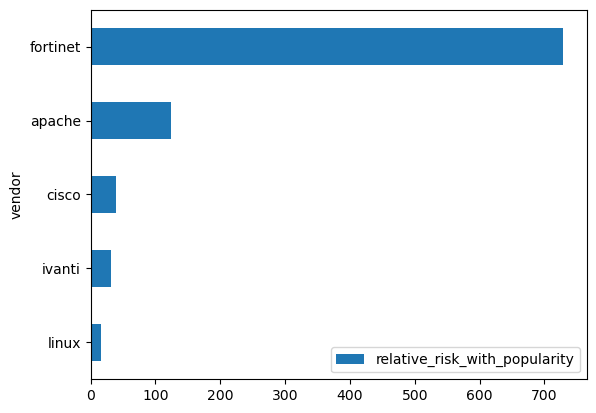

In [6]:
risk_df.sort_values('relative_risk_with_popularity').tail(5).plot.barh(x = 'vendor', y = 'relative_risk_with_popularity')